# Heart Failure Prediction based on Health Features Analysis

## Introduction

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide. In Spain, cardiovascular disease continues to be the leading cause of death, with 230.5 death events per 100,000 inhabitants. 
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure. In this project, I will focus on analyzing the relationship between following features and the death event:
1) Sex and Age,
2) Anaemia,
3) Diabetes,
4) Ejection fraction,
5) High blood pressure,
6) Serum creatinine,
7) Smoking

- The dataset will be extracted from Kaggle and INE (Instituto Nacional de Estadistica).

In [173]:
# I will import the necessary libraries to analyze the dataset
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import plotly.express as px
import plotly.graph_objs as go
import requests
from bs4 import BeautifulSoup
import json
import datetime

In [107]:
df_original = pd.read_csv('heart_failure_clinical_records_dataset.csv',encoding='cp1252')
df = df_original.copy()

In [174]:
# First of all, let's take a look at the DataFrame head, which will allow us to identify the different features that we will analyze.
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


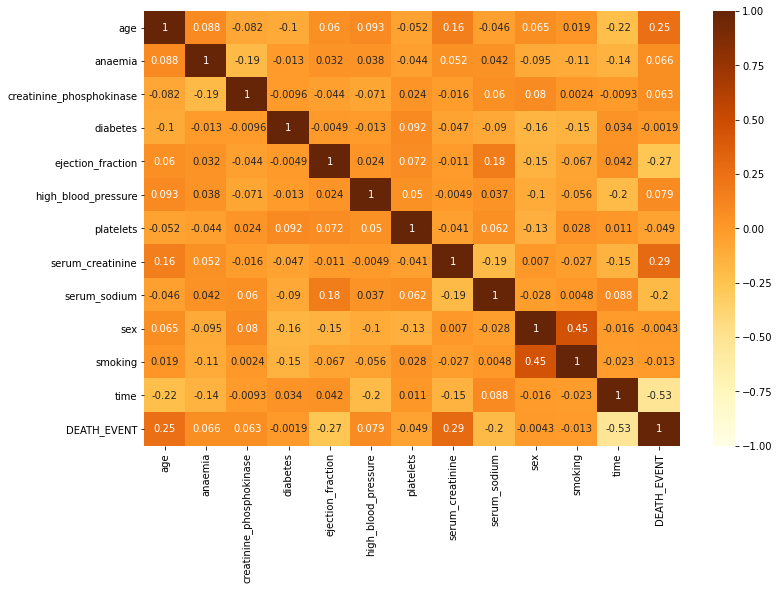

In [222]:
#Heat map will allow us to see how the 12 features relate to the death event
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), vmin=-1, cmap='YlOrBr', annot=True);

## Gender and Sex Analysis

Gender of patient Male = 1, Female = 0. 

In [109]:
df_ages = df.age.value_counts()

In [175]:
# First of all, I will start analyzing age distribution by creating a histogram. 
hist_data =[df['age'].values]
group_labels = ['Age'] 

fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(title_text='Age Distribution')

fig.show()

From the histogram above, we can say the spread is high between 45 and 75 while is significantly low below 40 years old and above 75. The highest group age seems to be around 60 years old. 

In [176]:
# Now, let's take a look at age and gender distribution together.
fig = px.histogram(df, x="age", color="sex", marginal="rug", 
                         hover_data=df.columns, title='Gender Distribution', color_discrete_sequence=["blue", "goldenrod"])
fig.show()

By looking at age and gender together, we can see that the dataset contains more females than males. Additionally, we can note, both male and females follow the same age distribution, where the highest value count characterizes the age group between 58 and 62 years old and the lowest between 88 and 97.

In [178]:
#I will now proceed to analyzing the relationship between gender and death events.
fig = px.pie(df, values='DEATH_EVENT',names='sex', title='Gender Split - Death Events', color_discrete_sequence=['blue', 'goldenrod'], width=680, height=480)
fig.show()

While there are more females than males in the dataset as we have seen in the above distribution charts, mortality rate is higher for males vs females. In fact, male cases end in death event in 65% of the cases while females seem to recover more easily, with death events representing 35% of the cases. 

In [221]:
fig = px.box(df, x='sex', y='age', points='all', color_discrete_sequence=['green', 'goldenrod'])
fig.update_layout(
    title_text='Gender - Age Spread')
fig.show()

In [226]:
fig = px.violin(df, y="age", x="sex", color="DEATH_EVENT", box=True, points="all", hover_data=df.columns)
fig.update_layout(title_text="Analysis in Age and Gender on Survival Status")
fig.show()

Sex - Gender of patient Male = 1, Female =0
Death event (red = No; purple; Yes)
- Survival spread is high in age groups from 50 to 70
- The survival rate is high for both male between 50 to 60 and female's age between 60 to 70 respectively
- Death events (red) in males is highly concentrated between 60 and 75 years old while in females there is not a clear concentration in a specific age group but we can see there are many fatal cases at 60  and 70 years old.

## Anaemia

Anaemia - 0 = No, 1 = Yes

The anemia itself can worsen cardiac function, both because it causes cardiac stress through tachycardia and increased stroke volume, and because it can cause a reduced renal blood flow and fluid retention, adding further stress to the heart.

In [197]:
#Does anaemia impact heart failure? I created a pie chart to easily understand what percent of the dataset has this disease.
labels = ['No Anaemia','Anaemia']
anaemia_yes = df[df['anaemia']==1]
anaemia_no = df[df['anaemia']==0]
values = [len(anaemia_no), len(anaemia_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text='Anaemia Analysis - Distribution')
fig.show()

The pie chart above shows the anaemia distribution among the subjects in the dataset. 57% (170) of subjects have anaemia while 43% (129) do not. 

Text(0.5, 1.0, 'Anaemia Analysis - Death Events')

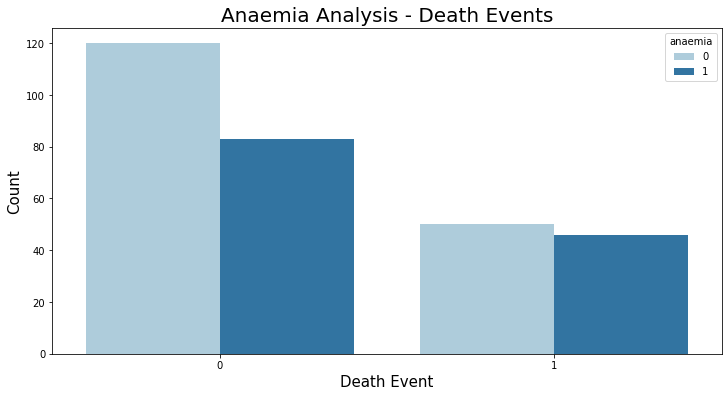

In [214]:
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
sns.countplot(x='DEATH_EVENT',hue='anaemia', data=df, palette='Paired')
ax.set_xlabel('Death Event', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Anaemia Analysis - Death Events', fontsize=20)

By taking a look at the split between people who have anaemia and the subjects who do not, we can conclude that:
- People who had anaemia (dark blue color) and survived are about 80 (over 60%)
- People who had no anaemia mostly survived - 120 out of 170 
- Number of Diseased people with or without anaemia is practically the same

## Diabetes

Having Type 2 diabetes or heart failure independently increases the risk for getting the other, and both often occur together. People who have Type 2 diabetes, characterized by elevated blood sugar levels, are two to four times more likely to develop heart failure than someone without diabetes. But heart failure, a condition in which the heart fails to efficiently pump oxygenated blood through the body, also is a risk factor for diabetes.

In [198]:
labels = ['No Diabetes','Diabetes']
diabetes_yes = df[df['diabetes']==1]
diabetes_no = df[df['diabetes']==0]
values = [len(diabetes_no), len(diabetes_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text='Diabetes Analysis - Distribution')
fig.show()

The pie chart above shows the diabetes distribution among the subjects in the dataset. 58% of subjects have anaemia while 42% do not. 

Text(0.5, 1.0, 'Diabetes Analysis - Death Events')

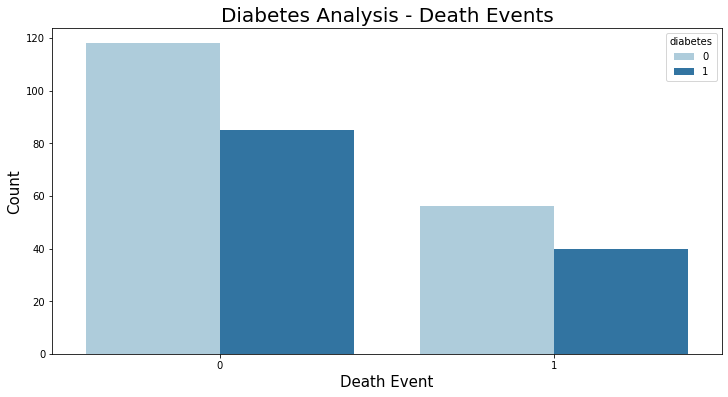

In [215]:
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
sns.countplot(x='DEATH_EVENT',hue='diabetes', data=df, palette='Paired')
ax.set_xlabel('Death Event', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Diabetes Analysis - Death Events', fontsize=20)

By taking a look at the split between people who have diabetes and the subjects who do not, we can conclude that:
- People who had diabetes (dark blue color) but survived doubles people who did not survive
- The difference in the survival ratio among the people who did not have diabetes is much more significant
- Death event likelihood is higher in the non-diabetes category which entails that diabetes does not seem to have a direct impact on heart failure

## Ejection Fraction

Ejection fraction (EF) is a measurement, expressed as a percentage, of how much blood the left ventricle pumps out with each contraction. 
According to Penn Medicine, an ejection fraction measurement under 40 percent may be evidence of heart failure or cardiomyopathy. An EF from 41 to 49 percent may be considered “borderline.” It does not always indicate that a person is developing heart failure. Instead, it may indicate damage, perhaps from a previous heart attack.

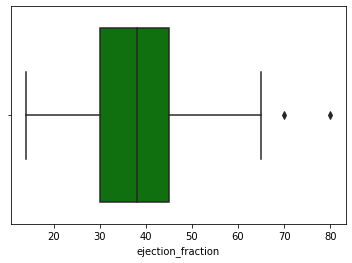

In [123]:
sns.boxplot(x = df.ejection_fraction, color = 'green')
plt.show()

In [138]:
px.violin(df, x='ejection_fraction', color='DEATH_EVENT', title='Ejection Fraction Distribution')

The violin chart allows us to take a look at different statitics related to the ejection fraction. By taking a closer look, we can see that the median ejection fraction among people who died was 30 while it was 38 (closer to borderline) for people who did not die.

## High Blood Pressure

High_blood_pressure - 0 = No, 1 = Yes

In [140]:
labels = ['No HBP','HBP']
HBP_yes = df[df['high_blood_pressure']==1]
HBP_no = df[df['high_blood_pressure']==0]
values = [len(HBP_no), len(HBP_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text='High Blood Pressure - Distribution Analysis')
fig.show()

From the above pie chart we can say that in our dataset 64.9%(194) pepoles are Non HBP subjects, while 35.1%(105) are HBP.

Text(0.5, 1.0, 'HBP Analysis - Death Events')

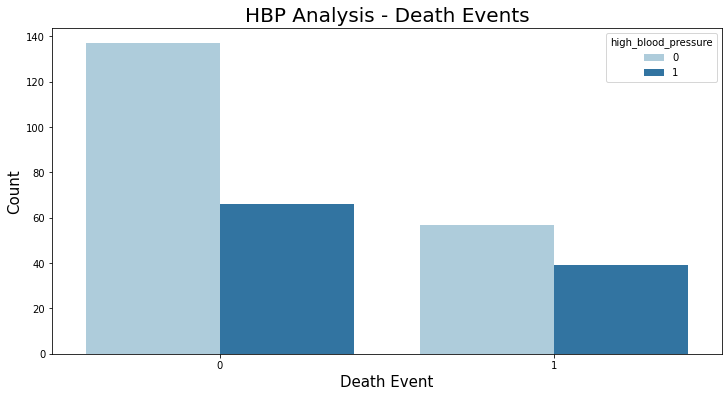

In [216]:
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
sns.countplot(x='DEATH_EVENT',hue='high_blood_pressure', data=df, palette='Paired')
ax.set_xlabel('Death Event', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('HBP Analysis - Death Events', fontsize=20)

By taking a look at the split between people who have HBP and the subjects who do not, we can conclude that:
- Among the 105 people who had HBP (dark blue color) survivors are around 70 people, which entails high blood pressure might have a direct impact on heart failure.
- Among the 194 people who did not have HBP, nearly 140 survived, which represents around 70% of the subjects.

## Platelets

Platelets are specialized disk-shaped cells in the blood stream that are involved in the formation of blood clots that play an important role in heart attacks, strokes, and peripheral vascular disease. 
Heart failure is associated with increased risk of venous thromboembolism, stroke, and sudden death. Platelet abnormalities have been well described in heart failure but the significance of platelets in contributing to the thromboembolic complications of heart failure remains uncertain. Furthermore, the role of antiplatelet agents in heart failure remains unclear.

## Serum Creatinine 

Elevated serum creatinine has been associated with increased mortality in hypertensive persons, the elderly, and patients with myocardial infarction or stroke in whom cardiovascular disease is the major cause of death. According to studies conducted by the National Center for Biotechnology Information, a high serum creatinine concentration within the normal range is a marker for increased risk of cerebrovascular disease in both normotensive and hypertensive subjects. 

In [172]:
fig = px.histogram(df, x="serum_creatinine", color="DEATH_EVENT", marginal="violin", hover_data=df.columns)
fig.show()

## Smoking 

Smoking - 0 = No, 1 = Yes

In [181]:
# Let's take a look at the smoking feature. Below, we will find a pie chart which splits smokers from non-smokers.
labels = ['Non Smoker','Smoker']
smoking_yes = df[df['smoking']==1]
smoking_no = df[df['smoking']==0]
values = [len(smoking_no), len(smoking_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text='Smoking Analysis - Distribution')
fig.show()

The pie chart above tells us that over 60% of the subjects are non-smokers. 

In [182]:
#As we have done with the analyzed features, we will now take a look at the relationship between smoking and death event.
fig = px.pie(df, values='smoking',names='DEATH_EVENT', title='Smoking Analysis - Death Events')
fig.show()

By taking a look at the pie chart above, we can notice practically the same split as in the above chart and this could lead as to think that again, death events represent around 30% of the smoking feature because about the same number of people were smokers...But let's dive deep in the survival analysis

In [191]:
smoking_yes_survived = smoking_yes[df["DEATH_EVENT"]==0]
smoking_yes_not_survived = smoking_yes[df["DEATH_EVENT"]==1]
smoking_no_survived = smoking_no[df["DEATH_EVENT"]==0]
smoking_no_not_survived = smoking_no[df["DEATH_EVENT"]==1]

labels = ['Smoker - Survived','Smoker - Not Survived', 'Non-smoker - Survived', 'Non-smoker - Not Survived']
values = [len(smoking_yes[df["DEATH_EVENT"]==0]),len(smoking_yes[df["DEATH_EVENT"]==1]),
         len(smoking_no[df["DEATH_EVENT"]==0]),len(smoking_no[df["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text='Survival Analysis - Smoking')
fig.show()

<ipython-input-191-62ca60226599>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-191-62ca60226599>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-191-62ca60226599>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-191-62ca60226599>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-191-62ca60226599>:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-191-62ca60226599>:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-191-62ca60226599>:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-191-62ca60226599>:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



From the above subplot we can conclude that in our dataset 68.8% do not SMOKE (out of which 45.8% survived and 22.1% died) and 32.1% do SMOKE (out of which 22.1% survived and 10.0% died).

## Introducing Data from INE's API...

As mentioned in the introduction of this project, cardiovascular diseases continue to be the leading cause of death not only worlwide but also in Spain. I decided to dig deeper into the different diseases that affect the circulatory system of the Spanish population. According to the INE's (Instituto Nacional de Estadistica) latest press release , the circulatory system diseases were once again the leading cause of death, accounting for 28.3% of total data death events. The diseases that are included in this category are the following:
1) Chronic rheumatic heart disease, 2) Hypertensive diseases, 3) Acute myocardial infarction, 4) Other ischemic heart diseases, 5) Heart failure and 6) Other heart illnesses (include heart arrhythmia and cardiac insuffiency). 
- The dataset includes both gendres and all age groups

In [160]:
url = 'https://servicios.ine.es/wstempus/js/es/DATOS_TABLA//t15/p417/a2018/l0/01004.px?tip=AMtv=causaslistareducida:053061ixenfermedadesdelsistemacirculatorio&tv=causaslistareducida:053enfermedadescardiacasreumaticascronicas&tv=causaslistareducida:054enfermedadeshipertensivas&tv=causaslistareducida:055infartoagudodemiocardio&tv=causaslistareducida:056otrasenfermedadesisquemicasdelcorazon&tv=causaslistareducida:057insuficienciacardiaca&tv=causaslistareducida:058otrasenfermedadesdelcorazon&tv=sexo:ambossexos&tv=edad:todaslasedades'

In [165]:
response = requests.get(url)
data_API = response.json()

In [166]:
new_list = []
for i in data_API:
    new_list.append(list(i.values()))
Clean_Data = {
}
for j, k in new_list:
    nombre = j[4:]
    valor = k[0]['Valor']
    Clean_Data[nombre] = valor

# split dictionary into keys and values 
keys = [] 
values = [] 
items = Clean_Data.items() 
for item in items: 
    keys.append(item[0]), values.append(item[1])

# constructing DataFrame with renamed columns
data = {'col_1': keys, 'col_2': values}
data2 = pd.DataFrame.from_dict(data)
df_API = data2.rename(columns={'col_1': 'Illness', 'col_2': 'Data'})

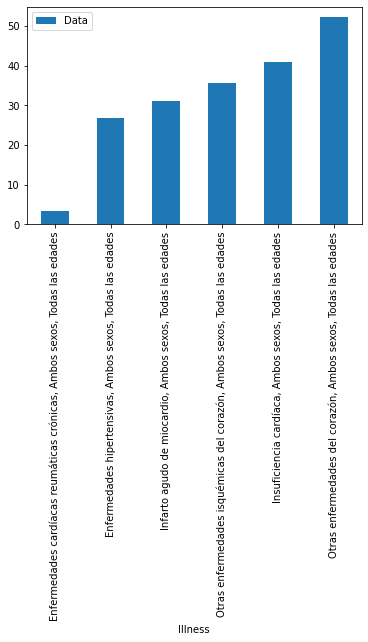

In [170]:
df_API.plot(x ='Illness', y='Data', kind = 'bar')
plt.show()

As we can see in the bar chart above, we can make the following conclusions:
- Heart failure or cardiac insuffiency and heart arrhythmias are the most common mortal diseases in Spain, followed by other ischemic heart diseases and acute myocardial infarction
- By diving deeper into cardiac sufficiency studies, I found out this disease is mainly caused by:
    -> High blood pressure: Blood pressure is the force blood exerts against artery walls due to the heart’s pumping action. Without this pressure blood would not circulate. When arteries lose some of their elasticity it increases blood pressure. When blood pressure is higher than normal the heart must pump with more force to ensure blood circulates throughout the body. If this situation is sustained over time, then the heart increases in size and loses the elasticity it requires to generate enough force.
    -> Heart rhythm disorders: such as a heart rate that is too low (bradycardia), can also be the trigger of heart failure, as too little blood is circulated. A heart rate that is too rapid (tachycardia) is associated with decreased stroke volume and can therefore also lead to heart failure. As we mentioned above, the ejection fraction (EF) refers to the amount, or percentage, of blood that is pumped (or ejected) out of the ventricles with each contraction. This percentage, or EF number, helps your health care provider determine how your heart is functioning.According to NCBI, bradycardia is associated to a low ejection fraction. 

Sources:
- https://www.heart.org/en/news/2019/06/06/diabetes-and-heart-failure-are-linked-treatment-should-be-too;
- https://pubmed.ncbi.nlm.nih.gov/15593047/;
- https://www.researchgate.net/publication/6767161_Platelets_and_heart_failure;
- https://www.mscbs.gob.es/organizacion/sns/planCalidadSNS/pdf/equidad/07modulo_06.pdf;
- https://www.ncbi.nlm.nih.gov
- https://www.clinicbarcelona.org/en/assistance/diseases/cardiac-insufficiency/causes



## Conclusion 

- While there are more females than males in the dataset as we have seen in the above distribution charts, mortality rate is higher for males vs females. In fact, male cases end in death event in 65% of the cases while females seem to recover more easily, with death events representing 35% of the cases.
- Regarding the 'smoking' feature, we can conclude that in our dataset 68.8% do not smoke (out of which 45.8% (137) survived and 22.1% (66) died) and 32.1% do smoke (out of which 22.1% (66) survived and 10.0% died (30)). Therefore showing approximately the same survival proportion and leading us to believe that further analysis needs to be conducted. 
- High blood pressure and an ejection fraction of less than 38% increase the risk of heart failure. These two features are consistent with INE's cause of death results. 
- Cardiovascular diseases are the main cause of death in Spain, being cardiac insuffiency and heart arrhythmia the most common mortal illnesses.